In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
sns.set()
% matplotlib inline

## 随机生成数据

(50, 2)
[[ 1.41281595  1.5303347 ]
 [ 1.81336135  1.6311307 ]
 [ 1.43289271  4.37679234]
 [ 1.87271752  4.18069237]
 [ 2.09517785  1.0791468 ]
 [ 2.73890793  0.15676817]
 [ 3.18515794  0.08900822]
 [ 2.06156753  1.96918596]
 [ 2.03835818  1.15466278]
 [-0.04749204  5.47425256]
 [ 1.71444449  5.02521524]
 [ 0.22459286  4.77028154]
 [ 1.06923853  4.53068484]
 [ 1.53278923  0.55035386]
 [ 1.4949318   3.85848832]
 [ 1.1641107   3.79132988]
 [ 0.74387399  4.12240568]
 [ 2.29667251  0.48677761]
 [ 0.44359863  3.11530945]
 [ 0.91433877  4.55014643]
 [ 1.67467427  0.68001896]
 [ 2.26908736  1.32160756]
 [ 1.5108885   0.9288309 ]
 [ 1.65179125  0.68193176]
 [ 2.49272186  0.97505341]
 [ 2.33812285  3.43116792]
 [ 0.67047877  4.04094275]
 [-0.55552381  4.69595848]
 [ 2.16172321  0.6565951 ]
 [ 2.09680487  3.7174206 ]
 [ 2.18023251  1.48364708]
 [ 0.43899014  4.53592883]
 [ 1.24258802  4.50399192]
 [ 0.00793137  4.17614316]
 [ 1.89593761  5.18540259]
 [ 1.868336    0.93136287]
 [ 2.13141478  1.138

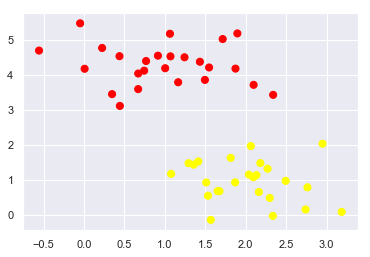

In [2]:
from sklearn.datasets.samples_generator import make_blobs
# 参数： 样本数量， 分类数量， 随机种子， 离散程度
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.6)
print(X.shape)
print(X,y)
plt.scatter(X[:,0],X[:,1], c=y, s=50, cmap='autumn')

## 随机分割

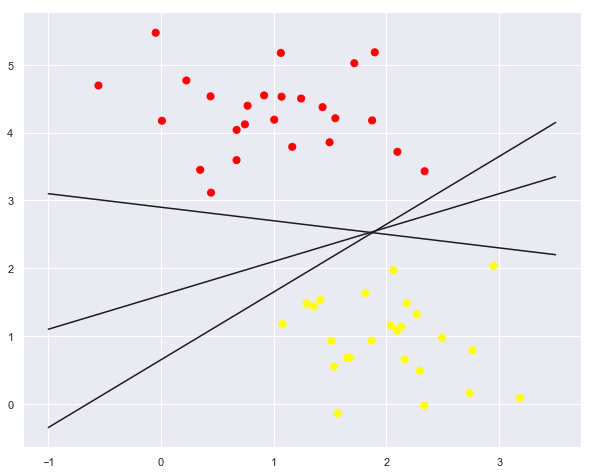

In [3]:
plt.figure(figsize=(10,8))
xfit = np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1],c=y, s=50, cmap='autumn')

for m,b in [(1,0.65), (0.5,1.6), (-0.2,2.9)]:
    plt.plot(xfit, m*xfit+b, '-k')

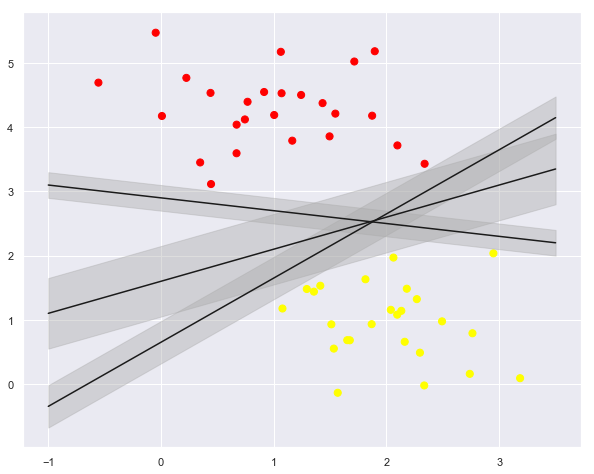

In [4]:
plt.figure(figsize=(10,8))
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:,0],X[:,1], c=y, s=50, cmap='autumn')

for m, b, d in [(1,0.65,0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit-d, yfit+d, edgecolor='none', color='#AAAAAA', alpha=0.4)

## 训练一个基本的SVM

In [5]:
from sklearn.svm import SVC

In [6]:
model = SVC(kernel='linear')
model.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
# 绘图函数
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x=np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    # 点到决策边界的距离
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins  画等高线
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors  画出支持向量
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300,marker='o', linewidth=1, facecolors='none', edgecolor='b');
    print(model.support_vectors_)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    

[[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [2.06156753 1.96918596]]


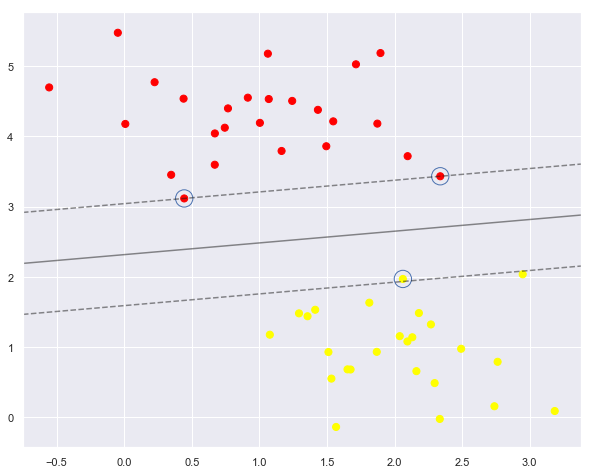

In [8]:
plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

sklearn 的 support_vectors_ 属性中存放的是支持向量

In [9]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

[[0.44359863 3.11530945]
 [1.25566754 3.38204112]
 [1.64003761 1.81948989]
 [0.83685684 2.13635938]]
[[0.44359863 3.11530945]
 [0.59009904 2.96974544]
 [2.33812285 3.43116792]
 [0.83685684 2.13635938]
 [1.96066731 2.25169776]]


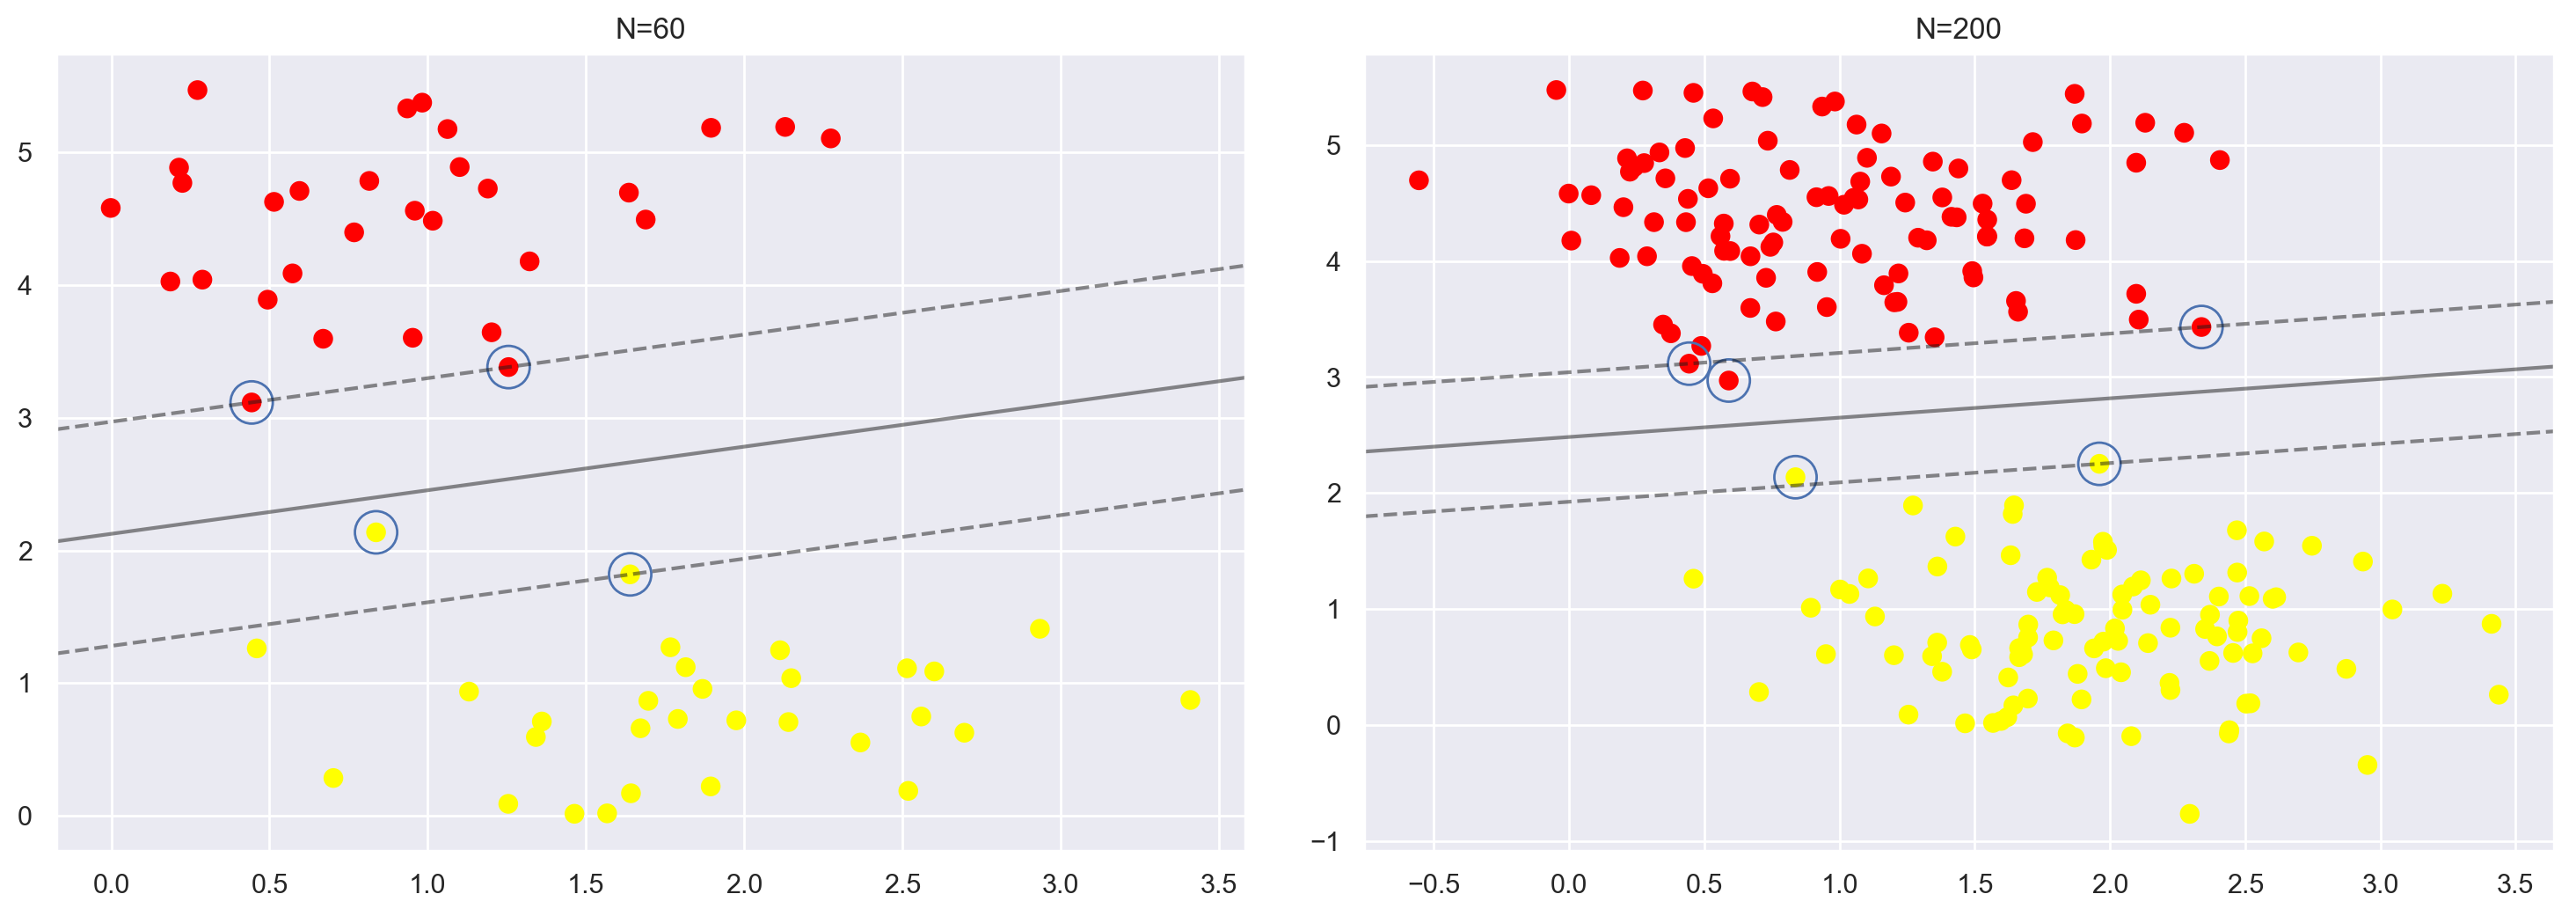

In [10]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.6)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear')
#     model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:,0], X[:,1],c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, ax)
    
fig, ax = plt.subplots(1,2,figsize=(16,6),dpi=200)
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 200]):
    plot_svm(N, axi)
    axi.set_title('N={0}'.format(N))

## 对于非线性数据

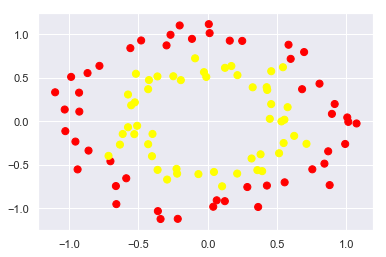

In [11]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.6, noise=.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

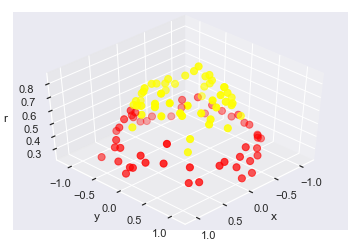

In [12]:
#加入了新的维度r
from mpl_toolkits import mplot3d
r = np.exp(-(X ** 2).sum(1))
def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

plot_3D(elev=45, azim=45, X=X, y=y)

[[-0.70229611 -0.45948479]
 [ 0.28506555 -0.7561716 ]
 [ 0.68007278  0.36980896]
 [-0.29772663  0.87402051]
 [-0.58831211 -0.65546114]
 [ 0.89518629  0.08569584]
 [-0.92671656  0.1119003 ]
 [ 0.1584835   0.92809564]
 [ 0.42628935 -0.73938297]
 [ 0.54195369  0.62269818]
 [-0.71612719 -0.39759269]
 [-0.51831342  0.54728691]
 [ 0.71170873 -0.25893231]
 [-0.29341564 -0.67016186]
 [ 0.10312118 -0.747792  ]]


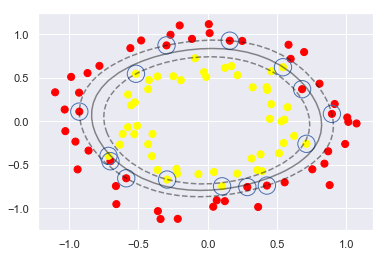

In [13]:
clf = SVC(kernel='rbf',C=100)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
